In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
speed = 0.3
cfg = 'configs/west_box.yml' #'configs/east_box.yml' #'configs/Mississauga_cfg.yml' # 'configs/Point_Edward_cfg.yml' #
model = EVSpaceModel(cfg=cfg,ModelP_price_set_mechanism = 'none')  
model.run_model(2400) #24*365   
model.save()

mdf = model.datacollector.get_model_vars_dataframe()


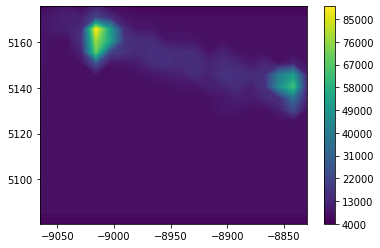

In [3]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


<AxesSubplot:xlabel='hour'>

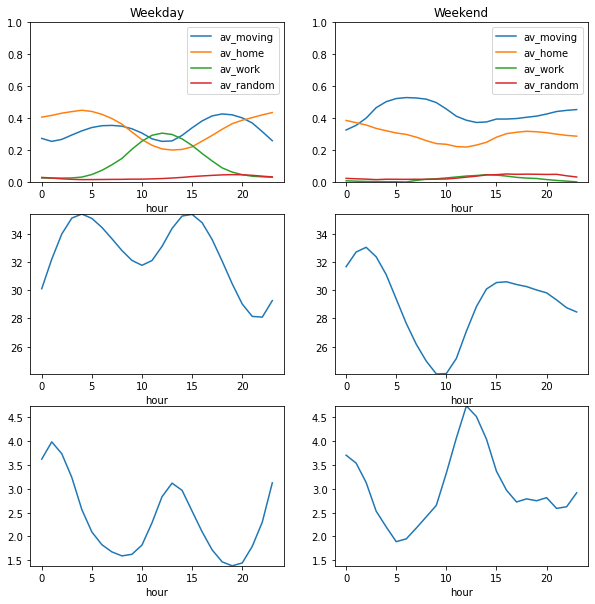

In [4]:
import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))
mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
mdf=mdf[mdf['date_time']>pd.to_datetime('2022-01-03')]
hourly = mdf.groupby(['isbusinessday','hour']).mean()
mdfweekday = mdf[mdf['isbusinessday'] == True]
hourlyweekday = mdfweekday.groupby(['hour']).mean()
mdfweekend = mdf[mdf['isbusinessday'] == False]
hourlyweekend = mdfweekend.groupby(['hour']).mean()

fig, ax = plt.subplots(3,2,figsize=(10,10))

hourlyweekday[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,0],title='Weekday',ylim=(0,1))
hourlyweekday['av_charge'].plot(ax=ax[1,0],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekday['charge_load'].plot(ax=ax[2,0],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))
hourlyweekend[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,1],title='Weekend',ylim=(0,1))
hourlyweekend['av_charge'].plot(ax=ax[1,1],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekend['charge_load'].plot(ax=ax[2,1],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))

In [5]:
hourlyweekend

,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random,lat,lon,seed,price,isbusinessday
hour,,,,,,,,,,,,,
0,31.660730,1.571429,0.097500,3.702546,0.325714,0.385357,0.007857,0.023214,46.198755,-80.37533,9375.0,1.0,0.0
1,32.697864,1.428571,0.086071,3.536294,0.355000,0.371429,0.005714,0.020714,46.198755,-80.37533,9375.0,1.0,0.0
2,33.033302,1.500000,0.072500,3.129381,0.400000,0.357143,0.004286,0.018571,46.198755,-80.37533,9375.0,1.0,0.0
3,32.361996,1.000000,0.062500,2.528096,0.465357,0.335714,0.003214,0.015357,46.198755,-80.37533,9375.0,1.0,0.0
4,31.100032,1.714286,0.071786,2.198843,0.502857,0.321071,0.002500,0.017857,46.198755,-80.37533,9375.0,1.0,0.0
5,29.375816,1.785714,0.087143,1.888757,0.522500,0.307143,0.002143,0.017500,46.198755,-80.37533,9375.0,1.0,0.0
6,27.649838,2.250000,0.092143,1.947239,0.528571,0.298214,0.000714,0.017143,46.198755,-80.37533,9375.0,1.0,0.0
7,26.170249,3.035714,0.108929,2.172905,0.526071,0.281071,0.010357,0.017857,46.198755,-80.37533,9375.0,1.0,0.0
8,24.971619,2.678571,0.139643,2.410220,0.518571,0.258929,0.018214,0.017143,46.198755,-80.37533,9375.0,1.0,0.0


In [6]:

mdf_2 = pd.read_csv('Data/mdf_Mississauga_355.csv')
new = mdf_2["COM"].str.replace(')','')
new = new.str.replace('(','')
new = new.str.split(",", n = 1, expand = True)
new = new.astype(float)

mdf_2['lat'] = new[1]
mdf_2['long'] = new[1]

FileNotFoundError: [Errno 2] No such file or directory: 'Data/mdf_Mississauga_355.csv'